In [1]:
from FileIO import FileIO
from PlotUtility import plot_multi_channel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
io = FileIO()
exps = io.load_experiment('s1')
gloves = exps['S1_E1_A1']['glove']


first 4 principle components catpures 95 percent of all variances


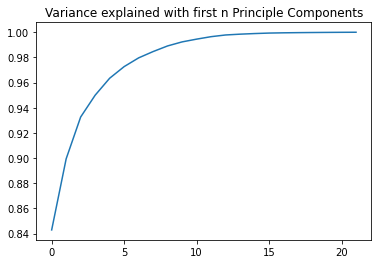

In [3]:
pca = PCA(svd_solver='auto')
pca.fit(gloves)
plt.title('Variance explained with first n Principle Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(f'first {np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0]} principle components catpures 95 percent of all variances')

In [4]:
pc = pca.transform(gloves)
projection = pca.inverse_transform(pc)

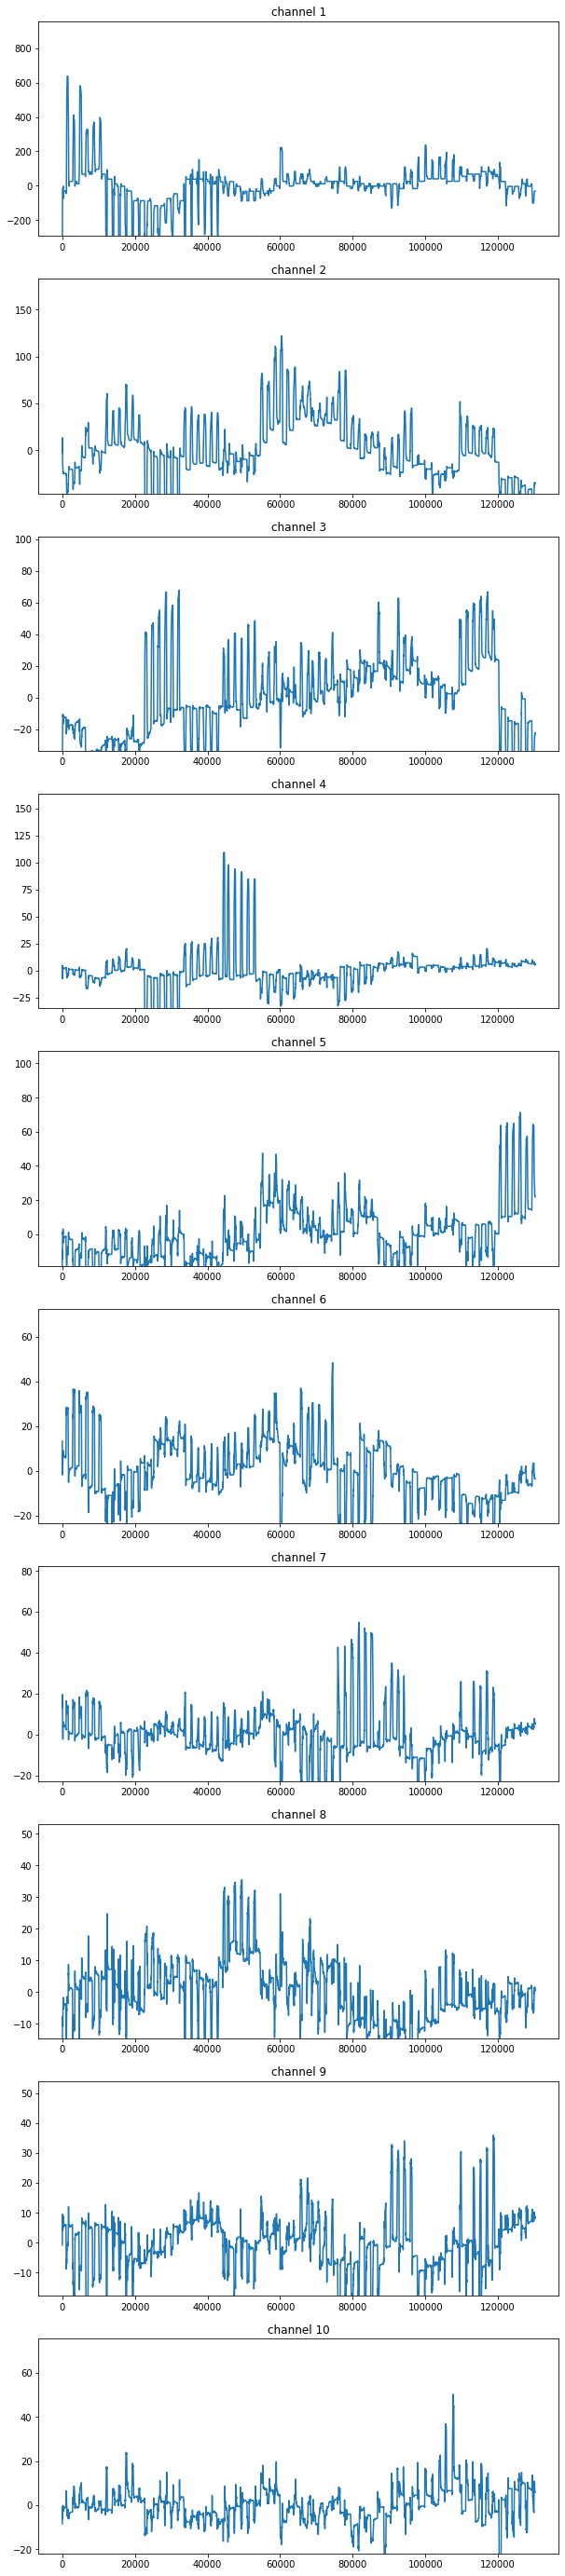

In [21]:
plot_multi_channel(pc[:,:10],titles = ['channel ' +str(i+1) for i in range(22)])

In [5]:
io = FileIO()
exps = io.load_experiment('s1')
gloves = exps['S1_E1_A1']['glove']
transformer = FastICA(random_state=1)
X_transformed = transformer.fit_transform(gloves)

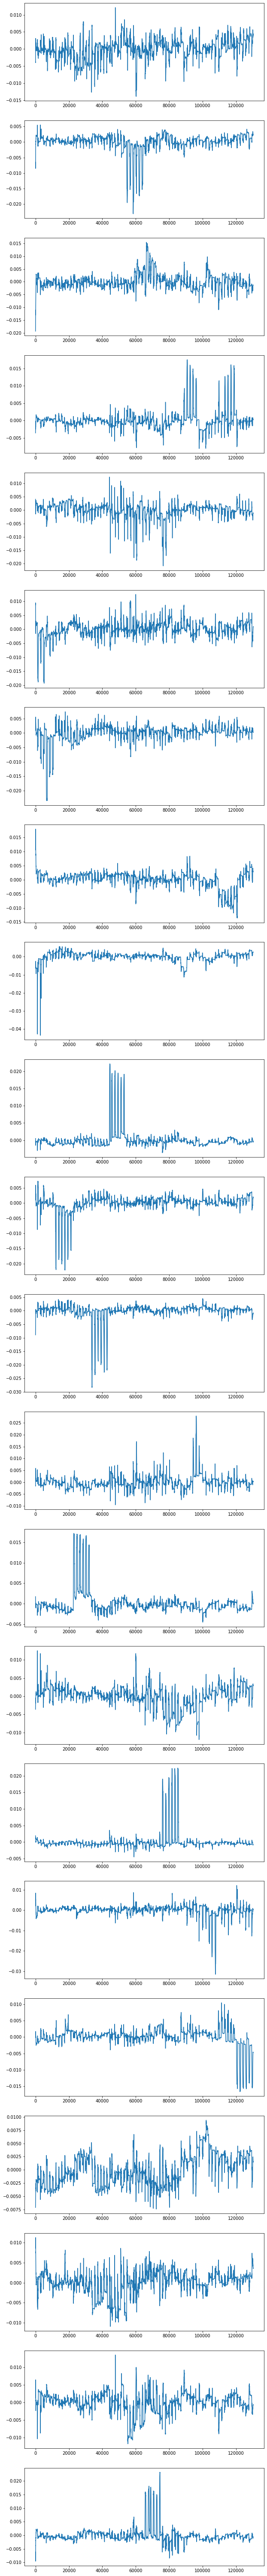

In [6]:
plot_multi_channel(X_transformed)

In [25]:
sig_len = 100000
p_val = []
stats = []
for i in range(X_transformed.shape[1]):
    sig = X_transformed[:sig_len,i]
    res = acorr_ljungbox(sig, lags=[1], return_df=True)
    p_val.append(float(res['lb_pvalue']))
    stats.append(float(res['lb_stat']))
plot_multi_channel(X_transformed[:sig_len,:5],x= [],titles = ['ljungbox score is '+str(i) for i in stats])

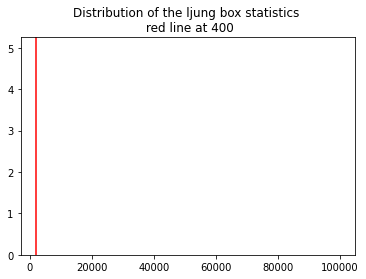

In [ ]:
plt.title('Distribution of the ljung box statistics \n red line at 400')
plt.axvline(2000,color = 'r')
plt.hist(stats,bins =30);

In [31]:
sum(stats>4000)

TypeError: '>' not supported between instances of 'list' and 'int'